In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
pd.set_option('display.max_columns', None)
import warnings #to ignore the warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#### 01 - Problem (case study)
    - Data Description.
    - Goal: Predict Total Claim Amount through Linear Regression

#### 02 - Getting Data
Read the .csv file.

In [2]:
df = pd.read_csv("marketing_customer_analysis.csv")
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

#### 03 - Cleaning/Wrangling/EDA
    - Change headers names.
    - Deal with NaN values.
    - Categorical Features.
    - Numerical Features.
    - Exploration.

In [4]:
df_new_cols = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]

df_new_cols

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [5]:
df_new_cols[8] = 'employment_status'

df.columns = df_new_cols

df = df.drop(columns = ['unnamed:_0'])

df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [6]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [7]:
cols_categorical_nan = ['state', 'response', 'vehicle_class', 'vehicle_size', 'vehicle_type']

df[cols_categorical_nan] = df[cols_categorical_nan].fillna("unknown")

df.isna().sum()

customer                           0
state                              0
customer_lifetime_value            0
response                           0
coverage                           0
education                          0
effective_to_date                  0
employment_status                  0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          633
months_since_policy_inception      0
number_of_open_complaints        633
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                      0
vehicle_size                       0
vehicle_type                       0
dtype: int64

In [8]:
cols_numerical_nan = ['months_since_last_claim', 'number_of_open_complaints']
df[cols_numerical_nan].head()

,months_since_last_claim,number_of_open_complaints
0,7.0,0.0
1,3.0,0.0
2,34.0,0.0
3,10.0,0.0
4,NaN,NaN


In [9]:
months_since_last_claim_mean = df['months_since_last_claim'].mean()

number_of_open_complaints_mean = df['number_of_open_complaints'].mean()

In [10]:
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(months_since_last_claim_mean)

df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(number_of_open_complaints_mean)

df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [12]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], format='%m/%d/%y')

In [13]:
df['effective_to_date_month'] = df['effective_to_date'].dt.month

df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1


In [14]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,unknown,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,unknown,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,253,15.149071,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.000000,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.000000,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,unknown,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.000000,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


#### 04 - Processing Data
    - Dealing with outliers.
    - Normalization.
    - Encoding Categorical Data.
    - Splitting into train set and test set.

In [15]:
print(df.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [16]:
numerical = pd.DataFrame(df.select_dtypes(include=[np.number]))
categorical = pd.DataFrame(df.select_dtypes(include=[np.object]))

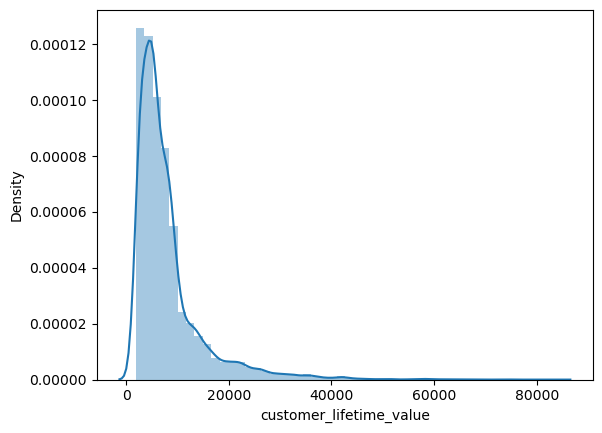

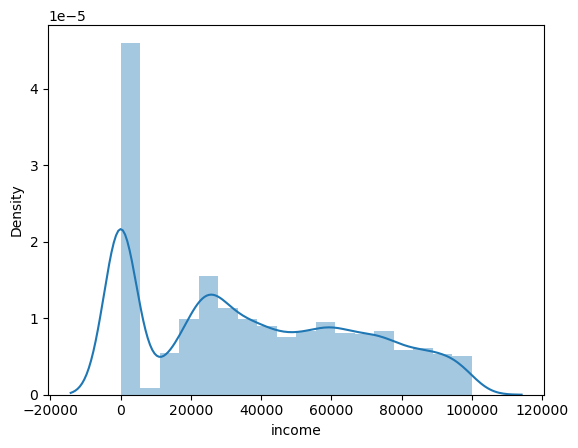

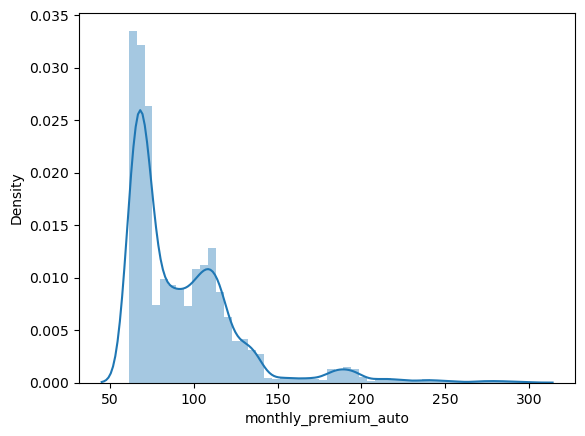

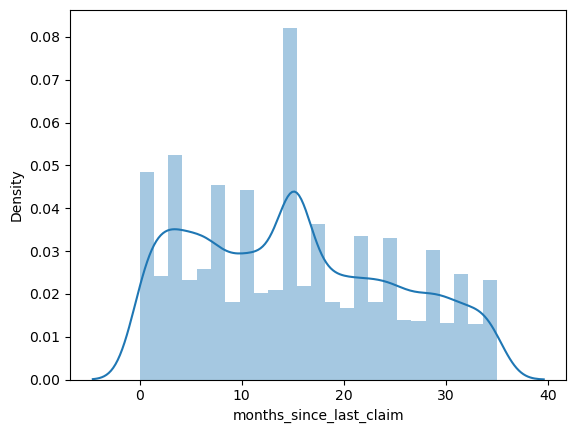

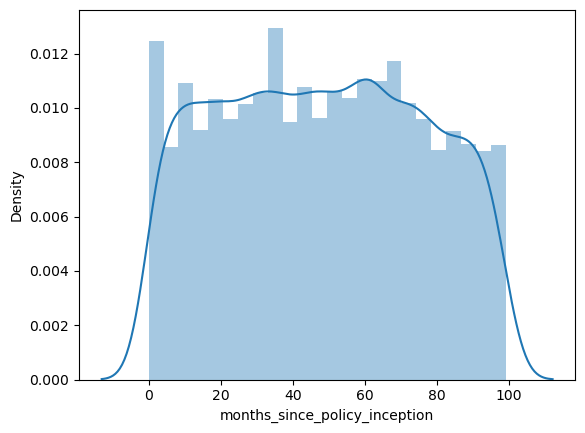

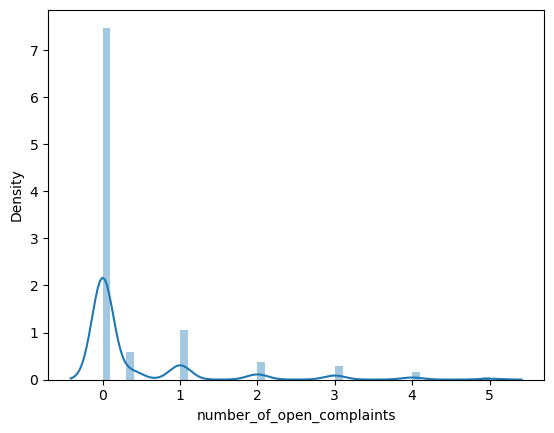

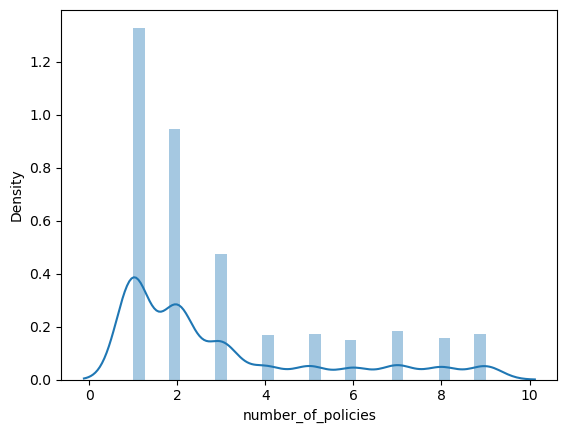

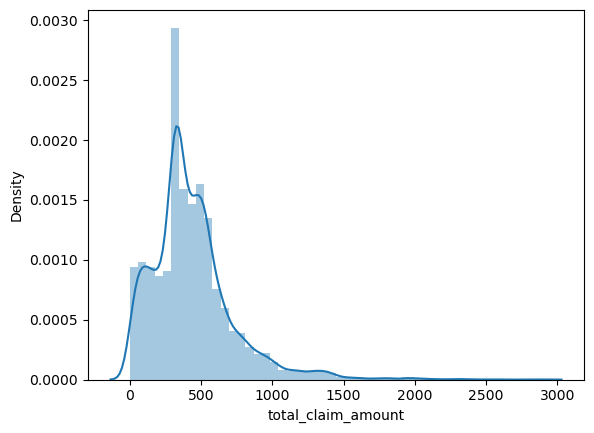

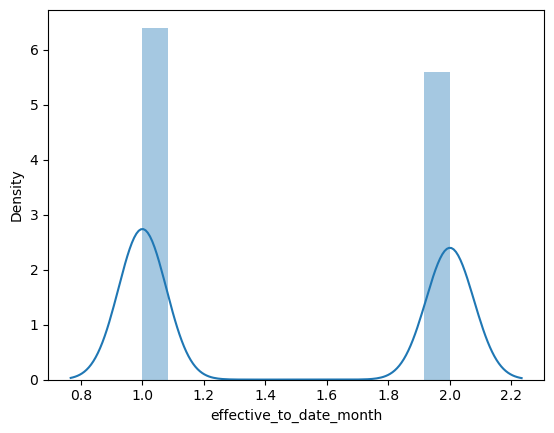

In [17]:
for column in numerical.columns:
    sns.distplot(df[column])
    plt.show()

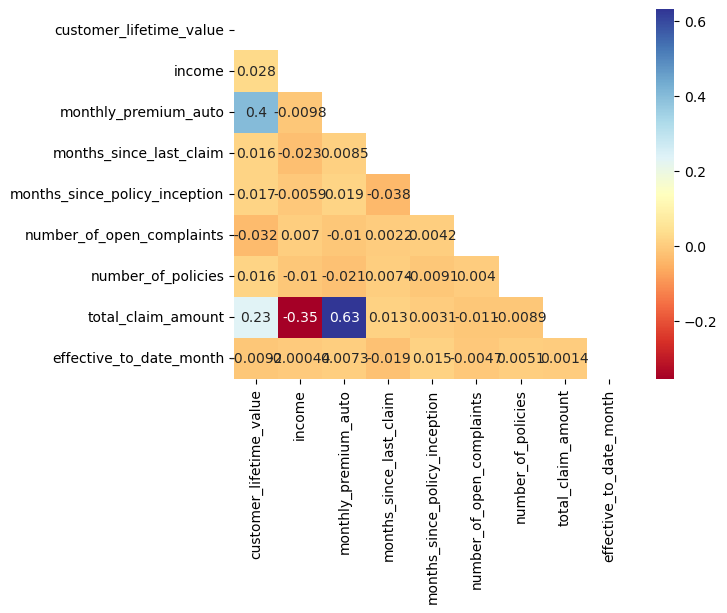

In [18]:
correlation = numerical.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, annot=True, mask=mask,cmap='RdYlBu')
plt.show()

#Here we are looking for multicollinearity, which is not a factor here. 

In [19]:
df_trans = df.copy()

def boxcox_transform(df):
    numeric_cols = df_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        df_trans[column] = np.where(df_trans[column]<=0, np.NAN, df_trans[column]) 
        df_trans[column] = df_trans[column].fillna(df_trans[column].mean())
        transformed_data, ci = stats.boxcox(df_trans[column])
        df_trans[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci
df, _ci = boxcox_transform(df_trans)

df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,2.728415,No,Basic,College,2011-02-18,Employed,M,1241.652611,Suburban,Married,0.682723,3.688833,22.277861,0.464562,1.481918,Corporate Auto,Corporate L3,Offer3,Agent,28.426165,Four-Door Car,Medsize,unknown,0.571203
1,KX64629,California,2.681977,No,Basic,College,2011-01-18,Unemployed,F,1279.349323,Suburban,Single,0.682838,1.555009,13.011677,0.464562,0.000000,Personal Auto,Personal L3,Offer4,Call Center,45.205281,Four-Door Car,Medsize,unknown,0.000000
2,LZ68649,Washington,2.777786,No,Basic,Bachelor,2011-02-10,Employed,M,769.901284,Suburban,Single,0.683590,12.151748,14.946662,0.464562,0.608253,Personal Auto,Personal L3,Offer3,Call Center,36.393037,SUV,Medsize,A,0.571203
3,XL78013,Oregon,2.791099,Yes,Extended,College,2011-01-11,Employed,M,1258.312585,Suburban,Single,0.683553,4.966281,1.670780,0.464562,0.608253,Corporate Auto,Corporate L3,Offer2,Branch,36.543679,Four-Door Car,Medsize,A,0.000000
4,QA50777,Oregon,2.758195,No,Premium,Bachelor,2011-01-17,Medical Leave,F,802.453581,Suburban,Married,0.683758,6.842648,14.946662,-0.776286,1.368807,Personal Auto,Personal L2,Offer1,Branch,44.088400,Four-Door Car,Medsize,unknown,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,2.779210,No,Premium,Bachelor,2011-01-19,Unemployed,F,1279.349323,Suburban,Married,0.684198,6.842648,18.221035,-0.776286,1.368807,Personal Auto,Personal L1,Offer3,Web,57.390735,Luxury Car,Medsize,A,0.000000
10906,KX53892,Oregon,2.733056,No,Basic,College,2011-01-06,Employed,F,1441.066852,Urban,Married,0.682873,3.688833,27.294671,0.464562,1.293804,Personal Auto,Personal L3,Offer2,Branch,27.440557,Four-Door Car,Medsize,A,0.000000
10907,TL39050,Arizona,2.793163,No,Extended,Bachelor,2011-02-06,Employed,F,1106.354143,Rural,Married,0.684114,5.356491,25.766946,0.464562,0.608253,Corporate Auto,Corporate L3,Offer1,Web,32.453095,Luxury SUV,Medsize,unknown,0.571203
10908,WA60547,California,2.769587,No,Premium,College,2011-02-13,Employed,F,1484.972511,Urban,Divorced,0.683989,7.012664,13.406564,1.928608,1.293804,Personal Auto,Personal L1,Offer1,Branch,41.246672,SUV,Medsize,A,0.571203


In [20]:
#FUNCTION TO REMOVE OUTLIERS. REMEMBER TO REMOVE OUTLIERS AFTER THE FEATURE SELECTION
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,2.728415,No,Basic,College,2011-02-18,Employed,M,1241.652611,Suburban,Married,0.682723,3.688833,22.277861,0.464562,1.481918,Corporate Auto,Corporate L3,Offer3,Agent,28.426165,Four-Door Car,Medsize,unknown,0.571203
1,KX64629,California,2.681977,No,Basic,College,2011-01-18,Unemployed,F,1279.349323,Suburban,Single,0.682838,1.555009,13.011677,0.464562,0.000000,Personal Auto,Personal L3,Offer4,Call Center,45.205281,Four-Door Car,Medsize,unknown,0.000000
2,LZ68649,Washington,2.777786,No,Basic,Bachelor,2011-02-10,Employed,M,769.901284,Suburban,Single,0.683590,12.151748,14.946662,0.464562,0.608253,Personal Auto,Personal L3,Offer3,Call Center,36.393037,SUV,Medsize,A,0.571203
3,XL78013,Oregon,2.791099,Yes,Extended,College,2011-01-11,Employed,M,1258.312585,Suburban,Single,0.683553,4.966281,1.670780,0.464562,0.608253,Corporate Auto,Corporate L3,Offer2,Branch,36.543679,Four-Door Car,Medsize,A,0.000000
4,QA50777,Oregon,2.758195,No,Premium,Bachelor,2011-01-17,Medical Leave,F,802.453581,Suburban,Married,0.683758,6.842648,14.946662,-0.776286,1.368807,Personal Auto,Personal L2,Offer1,Branch,44.088400,Four-Door Car,Medsize,unknown,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,2.779210,No,Premium,Bachelor,2011-01-19,Unemployed,F,1279.349323,Suburban,Married,0.684198,6.842648,18.221035,-0.776286,1.368807,Personal Auto,Personal L1,Offer3,Web,57.390735,Luxury Car,Medsize,A,0.000000
10906,KX53892,Oregon,2.733056,No,Basic,College,2011-01-06,Employed,F,1441.066852,Urban,Married,0.682873,3.688833,27.294671,0.464562,1.293804,Personal Auto,Personal L3,Offer2,Branch,27.440557,Four-Door Car,Medsize,A,0.000000
10907,TL39050,Arizona,2.793163,No,Extended,Bachelor,2011-02-06,Employed,F,1106.354143,Rural,Married,0.684114,5.356491,25.766946,0.464562,0.608253,Corporate Auto,Corporate L3,Offer1,Web,32.453095,Luxury SUV,Medsize,unknown,0.571203
10908,WA60547,California,2.769587,No,Premium,College,2011-02-13,Employed,F,1484.972511,Urban,Divorced,0.683989,7.012664,13.406564,1.928608,1.293804,Personal Auto,Personal L1,Offer1,Branch,41.246672,SUV,Medsize,A,0.571203


In [21]:
y = numerical['total_claim_amount']
x = numerical.drop(['total_claim_amount'], axis=1)

In [22]:
transformer = MinMaxScaler().fit(x)
x_minmax = transformer.transform(x) 
print(x_minmax.shape)

(10910, 8)


In [23]:
x = pd.DataFrame(x_minmax,columns=x.columns)
x.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.0


In [24]:
categorical

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,unknown
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,unknown
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [25]:
categorical = categorical.drop(columns=['customer'])
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,unknown
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,unknown
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,unknown


In [26]:
categorical = pd.get_dummies(categorical, drop_first=True)
categorical

,state_California,state_Nevada,state_Oregon,state_Washington,state_unknown,response_Yes,response_unknown,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_unknown,vehicle_type_unknown
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0
10906,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10907,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
10908,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [27]:
X_concat = pd.concat([x, categorical], axis=1)
X_concat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date_month,state_California,state_Nevada,state_Oregon,state_Washington,state_unknown,response_Yes,response_unknown,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_unknown,vehicle_type_unknown
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.432831,0.404040,0.076851,0.750,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.800000,0.625,1.0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_concat, y, test_size=0.35, random_state=42)

#### 05 - Modeling
    - Apply model.

In [29]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
predictions = model.predict(X_test)
predictions.shape

(3819,)

In [31]:
predictions

array([388.2594243 , 439.42703866, 562.00014768, ..., 522.79008811,
        24.60310412, 720.16519043])

#### 06 - Model Validation
    - R2.
    - MSE.
    - RMSE.
    - MAE.

In [32]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE =", MAE)

r2 =  0.7745138819089384
RMSE =  136.5437357705281
MSE =  18644.191778171793
MAE = 95.08325434352003
